<a href="https://colab.research.google.com/github/ShengHangNB/Datasets/blob/master/ML_Assignment2_decision_tree_c4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning Assignment 2**

Implementation of algorithm - Decision Tree C4.5




In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [145]:
df = pd.read_csv("https://raw.githubusercontent.com/ShengHangNB/Datasets/master/transfusion.csv")
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [146]:
# check whether there are some duplicated values in the datasets
df.duplicated().sum()

# The results show they are 215 duplicated samples in the datasets,
# I do not drop the duplicated values here because I want to 
# design the function in the algorithm to deal with the duplicated values.

215

In [147]:
# check whether thare are some null values for each attribute
df.isnull().any()

Recency (months)                              False
Frequency (times)                             False
Monetary (c.c. blood)                         False
Time (months)                                 False
whether he/she donated blood in March 2007    False
dtype: bool

In [148]:
# check the data type and non-null count values for each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [149]:
# Table of statistics for all numerical attributes:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [150]:
# get the attributes by using the df.keys() functions,
# then extract all the attributes except for the target name by using the slice method df.keys()[:-1]
attrs = df.keys()[:-1]
print("The attrbutes are: ")
for attr in attrs:
  print(attr)

print("\nThe target is ",df.keys()[-1])

The attrbutes are: 
Recency (months)
Frequency (times)
Monetary (c.c. blood)
Time (months)

The target is  whether he/she donated blood in March 2007


In [151]:
# split the datasets into the attributes datasets (input) and target datasets (output)
# X: DataFrame type   y: Series type
print("The number of samples in the total datasets are {}\n".format(df.shape[0]))
X = df[attrs]
y = df.iloc[:,-1]

# For the features datasets,target datasets, split them into the training datasets and testing datasets respectively
# The training datasets accounts for 67% of the total datasets,
# The testing datasets acoounts for 33% of the total datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state = 47)


print("The number of samples in the training datasets are {}".format(X_train.shape[0]))
print("The number of samples in the testing datasets are {}".format(X_test.shape[0]))

The number of samples in the total datasets are 748

The number of samples in the training datasets are 501
The number of samples in the testing datasets are 247


In [152]:
def get_split_pointSet(attr_series):
    '''
      功能:通过二分法将连续属性离散化处理
      array: 传入的一列属性的值，series类型
      返回值：所有划分点的集合,array类型
    '''
    unique_values = np.unique(attr_series)
    result = np.array([(unique_values[i] + unique_values[i+1]) / 2 for i in range(len(unique_values)-1)])

    return np.unique(result)

In [153]:
def get_discrete_variables(X,attr,split_point):
  '''
    功能：将连续型变量通过分裂点转换为大于分裂点和小于分离点的离散型变量
    X: 传入的数据集, DataFrame
    attr: 需要分割的属性
    split_point：划分点/分割点
  '''
  bins_to_cut = [min(X[attr]),split_point,max(X[attr])]
  labels_to_cut = [attr + ' < ' + str(split_point), attr + ' > ' + str(split_point)]
  categorized_column = pd.cut(X[attr], bins= bins_to_cut , labels = labels_to_cut, include_lowest=True)
  return categorized_column


In [154]:
def compute_entropy(y):
    '''
      功能：计算信息熵H(D)
      y: 传入的目标值series
      返回值：float类型的计算结果
    '''
    if len(y) < 2:
        return 0.0
    
    freq = y.value_counts(normalize=True)
    
    return -(freq * np.log2(freq + 1e-6)).sum()

In [155]:
def compute_info_gain_ratio(X,y,attr,split_point_list):
    '''
        计算连续型变量中特定属性的单个分裂点的信息增益
        
        X：包含属性的数据集, DataFrame类型
        y：包含目标值的数据集, Series类型
        attr: 要计算信息增益的属性，字符串类型
        split_point_lst: 分割点，float类型
        
        返回值：信息增益率计算结果，float类型; 最优划分点：float类型
        
    '''
    best_split_point = 0.0
    best_info_gain = 0.0
    split_entropy = 0.0
    print("{}'s splited points' list：{}".format(attr,split_point_list))
    if len(split_point_list) == 0:
      return 0, None

    else:
      for split_point in split_point_list:
          lower_index_boolean = X[attr] < split_point
          lower_X = X[lower_index_boolean]
          lower_y = y[lower_index_boolean]
          
          upper_index_boolean = X[attr] > split_point
          upper_X = X[upper_index_boolean]
          upper_y = y[upper_index_boolean]
          
          Ent_D = compute_entropy(y)
          
          lower_p = len(lower_X) / len(X)
          upper_p = len(upper_X ) / len(X)

          lower_result = lower_p * compute_entropy(lower_y)
          upper_result = upper_p * compute_entropy(upper_y)   
          
          info_gain = Ent_D - (lower_result + upper_result)

          categorized_column = get_discrete_variables(X,attr,split_point)

          split_entropy = compute_entropy(categorized_column)

          if info_gain > best_info_gain:
              best_info_gain = info_gain
              best_split_point = split_point
            
      info_gain_ratio = best_info_gain / split_entropy

      # print("{}特征的最优划分点为：{}".format(attr,best_split_point))
      # print("{}特征的信息增益率为：{}".format(attr,best_info_gain))
      return info_gain_ratio, best_split_point

In [156]:
class TreeNode:
  def __init__(self,node_name="",default_decision=None):
    self.children = {}
    self.split_point = 0.0
    self.name = node_name
    self.split_attr = None
    self.default_decision = default_decision
    self.decision = None
  
  def make(self,X,y):
    if self.default_decision is None:
      self.default_decision = y.mode()[0]

    print("Node name of this sub datasets: ",self.name)
    print("Input values:")
    print(X)
    print("\nTarget values:")
    print(y)

    if len(X) == 0:
      self.decision = self.default_decision
      print("Specially determining the decision ->", self.decision)
      print("------------------------------------------------------------------------------------------------------------")
      return
         
    else:
      target_unique_values = y.unique()
      if len(target_unique_values) == 1:
        self.decision = target_unique_values[0]
        print("Determining this node as the leaf node")
        print("Determining the decision ->", self.decision)
        print("------------------------------------------------------------------------------------------------------------")
        return

      else:
        max_infoGain_rate = 0.0
        best_split_point = 0.0
        best_split_point_list = []
        print()
        for attr in X.keys():
          split_point_list = get_split_pointSet(X[attr])
          if len(split_point_list) == 0:
            # 没有划分点了，说明对于此属性只有一种取值，因此对结果无任何信息增益，因此跳过此次循环执行下一次循环
            continue

          else:
            infoGain_rate,splited_point = compute_info_gain_ratio(X,y,attr,split_point_list)
            if infoGain_rate > max_infoGain_rate:
              max_infoGain_rate = infoGain_rate
              self.split_attr = attr
              best_split_point_list = split_point_list
              best_split_point = splited_point

        self.split_point = best_split_point

        if self.split_point != 0.0:

          X_copy = X.copy()
          discrete_class = self.split_attr + '-group'
          X_copy.loc[:,discrete_class] = get_discrete_variables(X_copy,self.split_attr,self.split_point)
          print("\nSplited by {} attribute，its information gain ratio：{}".format(self.split_attr,max_infoGain_rate)) 
          
          for value in X_copy[discrete_class].unique():
            index_boolean = X_copy[discrete_class] == value
            self.children[value] = TreeNode(node_name = value, default_decision=self.default_decision)
            
            # print("Its splited points' list：{}".format(best_split_point_list))
            print("Not enough to determine the decision, child's node is split below:")
            self.children[value].make(X[index_boolean],y[index_boolean])
        
        else:
          print('All attributes have no information gain (ratio)')
          y_mode = y.mode()

          if len(y_mode) == 1:
            better_decision = y_mode[0]
            print("Determining this node as the leaf node")
            print("Choosing the better decision ->",better_decision)
            self.decision = better_decision
            print("------------------------------------------------------------------------------------------------------------")

          else:
            decision = y_mode[0]
            print("Can not choose the better decision, these two samples have the sample inputs but different output")
            print("Determining this node as the leaf node")
            print("Just Choose the decision ->",decision)
            self.decision = decision
            print("------------------------------------------------------------------------------------------------------------")
          return


In [157]:
class TreeC4_5:
  def __init__(self):
    self.root = None

  def fit(self,X,y):
    self.root = TreeNode()
    self.root.make(X,y)

  def predict(self,samples):
    decision_list = []
    for sample_index in range(len(samples)):
      sample = samples.iloc[sample_index]
      decision = self.make_decision(sample) 
      decision_list.append(decision)
    return np.array(decision_list)

  def make_decision(self,sample):
    current_node = self.root
    while current_node.decision is None:
      attribute_to_split = current_node.split_attr
      attribute_value = sample[attribute_to_split]
      print("Testing: ",attribute_to_split,"->",attribute_value)
      
      if attribute_value > current_node.split_point:
        next_attr = current_node.split_attr + ' > ' + str(current_node.split_point)
      
      else:
        next_attr = current_node.split_attr + ' < ' + str(current_node.split_point)
          
      current_node = current_node.children[next_attr]

    print("Decision: ",current_node.decision)
    return current_node.decision

In [158]:
dt4_5 = TreeC4_5()
dt4_5.fit(X_train,y_train)

流式输出内容被截断，只能显示最后 5000 行内容。
492    0
743    0
711    0
740    0
495    0
452    0
677    0
747    0
477    0
710    0
496    0
494    0
470    0
480    0
481    0
726    0
450    0
738    0
734    0
741    0
485    0
483    0
721    0
493    0
466    0
723    0
428    0
737    0
735    0
402    0
448    0
366    0
736    0
497    0
729    0
484    0
479    0
733    0
498    0
Name: whether he/she donated blood in March 2007, dtype: int64
Determining this node as the leaf node
Determining the decision -> 0
------------------------------------------------------------------------------------------------------------
Not enough to determine the decision, child's node is split below:
Node name of this sub datasets:  Recency (months) < 6.5
Input values:
     Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
588                 2                  1                    250              2
211                 4                  1                    250              4
202    

In [159]:
  decisions = dt4_5.predict(X_test)
results = decisions == y_test
accuracy = sum(results) / len(results)
print("Accuracy: ", accuracy)

Testing:  Recency (months) -> 14
Testing:  Recency (months) -> 14
Testing:  Frequency (times) -> 3
Testing:  Time (months) -> 26
Testing:  Time (months) -> 26
Decision:  0
Testing:  Recency (months) -> 4
Testing:  Frequency (times) -> 7
Testing:  Frequency (times) -> 7
Testing:  Time (months) -> 25
Testing:  Frequency (times) -> 7
Testing:  Frequency (times) -> 7
Testing:  Time (months) -> 25
Testing:  Time (months) -> 25
Testing:  Time (months) -> 25
Testing:  Frequency (times) -> 7
Testing:  Time (months) -> 25
Testing:  Time (months) -> 25
Testing:  Recency (months) -> 4
Testing:  Time (months) -> 25
Decision:  1
Testing:  Recency (months) -> 12
Testing:  Recency (months) -> 12
Testing:  Frequency (times) -> 12
Testing:  Time (months) -> 58
Testing:  Frequency (times) -> 12
Testing:  Time (months) -> 58
Testing:  Frequency (times) -> 12
Testing:  Time (months) -> 58
Decision:  0
Testing:  Recency (months) -> 11
Testing:  Recency (months) -> 11
Testing:  Frequency (times) -> 3
Testin

In [181]:
from sklearn import tree 
import graphviz   

clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=47)
clf = clf.fit(X_train,y_train)

In [182]:
decisions = clf.predict(X_test)
result = [decision == target for decision,target in zip(decisions,y_test)]
accuracy = sum(result)/len(result)
print('Accuracy:',accuracy)

Accuracy: 0.7044534412955465


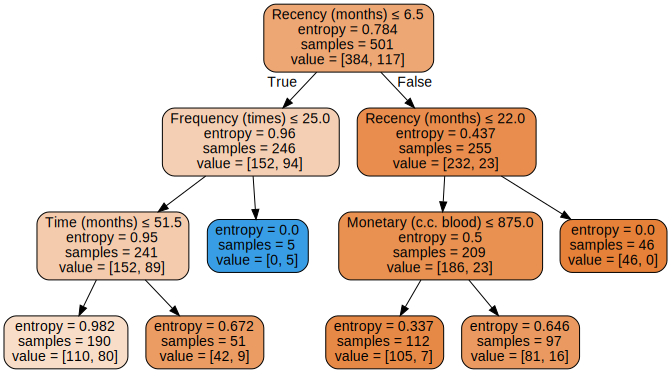

In [162]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.33,random_state=47)
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=3)
clf.fit(x_train,y_train)
dot_data = tree.export_graphviz(clf,out_file=None,feature_names=list(x_train.columns.values),filled=True,rounded=True,special_characters=True)
graphOfTree = graphviz.Source(dot_data)
graphOfTree